<a href="https://colab.research.google.com/github/jefterob2019/desafio_alura_store/blob/main/desafio_alura_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_4.csv"
}


dfs = []
for nome, url in urls.items():
    df_temp = pd.read_csv(url)
    df_temp['loja'] = nome
    dfs.append(df_temp)


df = pd.concat(dfs, ignore_index=True)

In [ ]:
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [6]:
for nome, url in urls.items():
    df_loja = pd.read_csv(url)
    faturamento_total = df_loja['Preço'].sum()
    print(f"{nome}: R$ {faturamento_total:,.2f}")

Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


In [22]:
vendas_por_categoria = df_loja.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
print(vendas_por_categoria)

Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades domesticas    201
livros                   187
instrumentos musicais    170
Name: Produto, dtype: int64


In [20]:
avaliacoes = {}
for nome, url in urls.items():
    df_loja = pd.read_csv(url)
    media_avaliacao = df_loja['Avaliação da compra'].mean()
    avaliacoes[nome] = round(media_avaliacao, 2)

print("Média de avaliação dos clientes por loja:")
for nome, media in avaliacoes.items():
    print(f"{nome}: {media}")

Média de avaliação dos clientes por loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.0


In [23]:
produtos_por_loja = df.groupby(['loja', 'Produto']).size().reset_index(name='quantidade')

print("Produtos mais vendidos por loja:")
for loja in df['loja'].unique():
    df_loja = produtos_por_loja[produtos_por_loja['loja'] == loja]
    mais_vendidos = df_loja.nlargest(5, 'quantidade')
    print(f"\n{loja}:")
    display(mais_vendidos)

print("\nProdutos menos vendidos por loja:")
for loja in df['loja'].unique():
    df_loja = produtos_por_loja[produtos_por_loja['loja'] == loja]
    menos_vendidos = df_loja.nsmallest(5, 'quantidade')
    print(f"\n{loja}:")
    display(menos_vendidos)

Produtos mais vendidos por loja:

Loja 1:


,loja,Produto,quantidade
24,Loja 1,Guarda roupas,60
37,Loja 1,Micro-ondas,60
47,Loja 1,TV Led UHD 4K,60
43,Loja 1,Secadora de roupas,58
3,Loja 1,Blocos de montar,56



Loja 2:


,loja,Produto,quantidade
79,Loja 2,Iniciando em programação,65
88,Loja 2,Micro-ondas,62
52,Loja 2,Bateria,61
91,Loja 2,Pandeiro,58
100,Loja 2,Violão,58



Loja 3:


,loja,Produto,quantidade
134,Loja 3,Kit banquetas,57
111,Loja 3,Cama king,56
138,Loja 3,Mesa de jantar,56
119,Loja 3,Cômoda,55
132,Loja 3,Jogo de panelas,55



Loja 4:


,loja,Produto,quantidade
161,Loja 4,Cama box,62
173,Loja 4,Faqueiro,59
162,Loja 4,Cama king,56
171,Loja 4,Dashboards com Power BI,56
163,Loja 4,Carrinho controle remoto,55



Produtos menos vendidos por loja:

Loja 1:


,loja,Produto,quantidade
11,Loja 1,Celular ABXY,33
26,Loja 1,Headset,33
41,Loja 1,Panela de pressão,35
40,Loja 1,Pandeiro,36
13,Loja 1,Ciência de dados com python,39



Loja 2:


,loja,Produto,quantidade
82,Loja 2,Jogo de tabuleiro,32
78,Loja 2,Impressora,34
87,Loja 2,Mesa de jantar,34
93,Loja 2,Poltrona,35
73,Loja 2,Fone de ouvido,37



Loja 3:


,loja,Produto,quantidade
105,Loja 3,Blocos de montar,35
131,Loja 3,Jogo de copos,36
139,Loja 3,Micro-ondas,36
140,Loja 3,Mochila,36
116,Loja 3,Copo térmico,38



Loja 4:


,loja,Produto,quantidade
178,Loja 4,Guitarra,33
177,Loja 4,Guarda roupas,34
202,Loja 4,Violão,37
166,Loja 4,Ciência de dados com python,38
176,Loja 4,Geladeira,38


In [24]:
custo_medio_frete = df.groupby('loja')['Frete'].mean().reset_index()

print("Custo médio de frete por loja:")
for index, row in custo_medio_frete.iterrows():
    print(f"{row['loja']}: R$ {row['Frete']:,.2f}")

Custo médio de frete por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


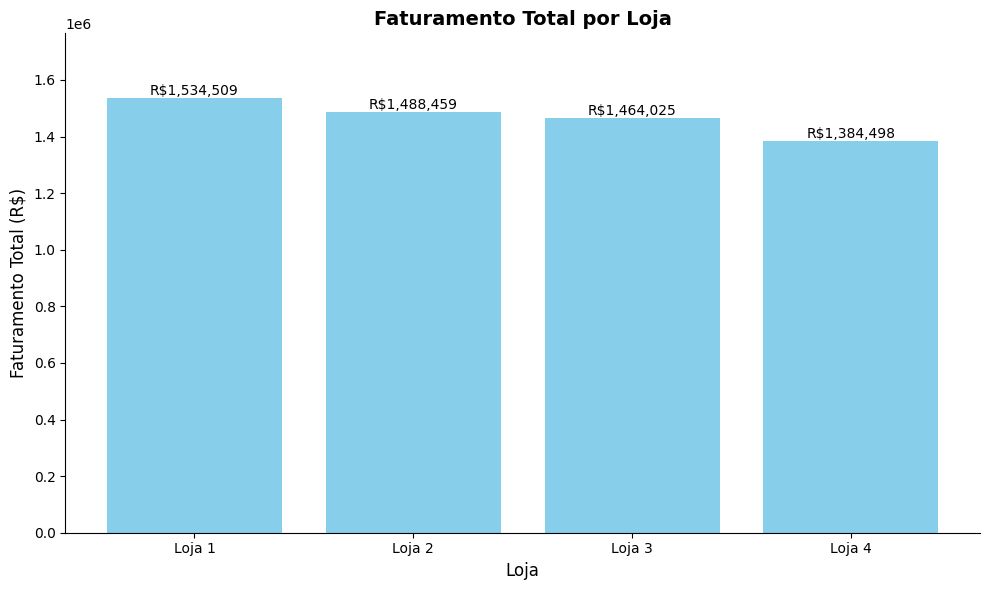

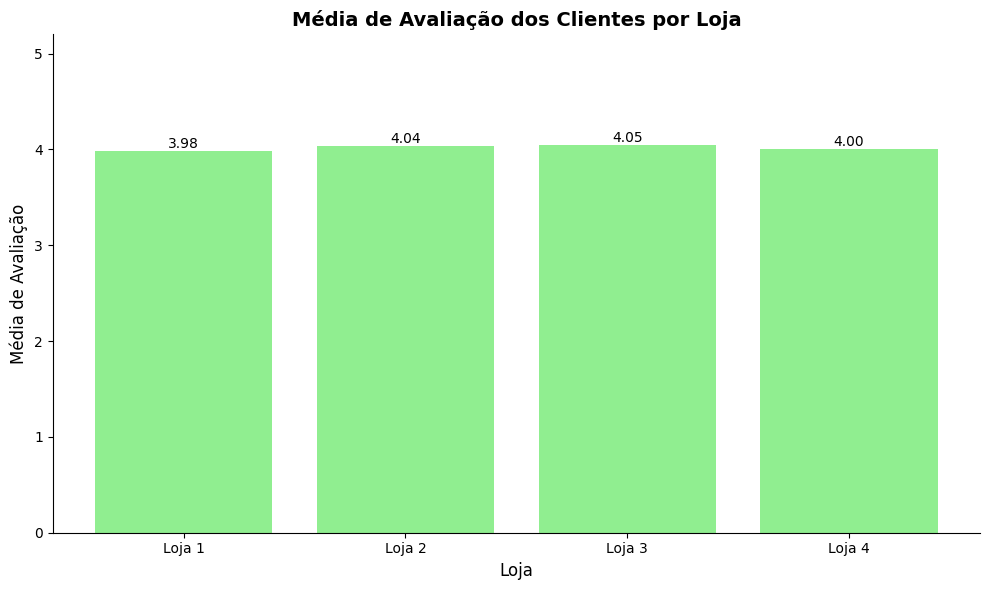

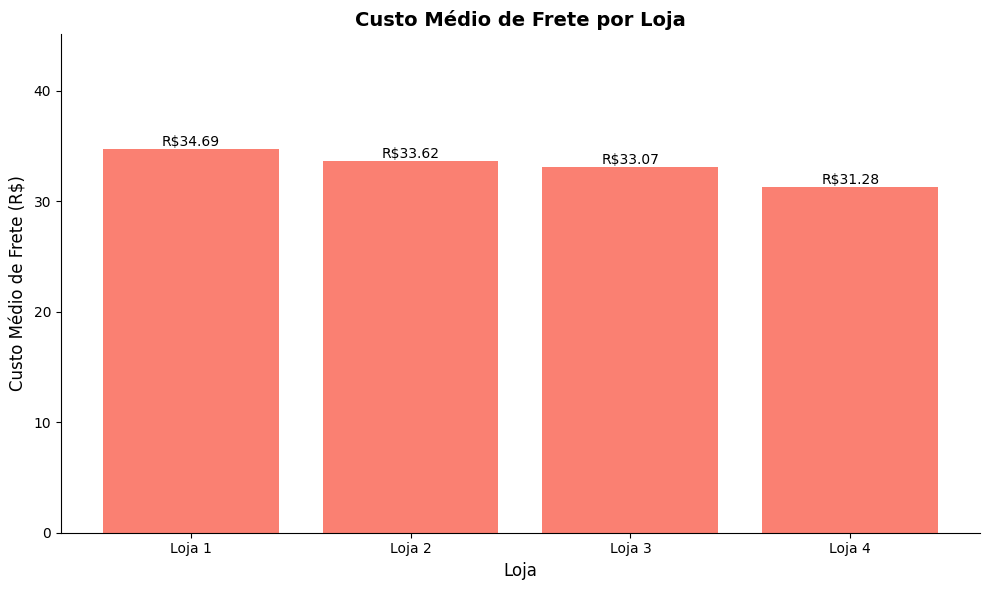

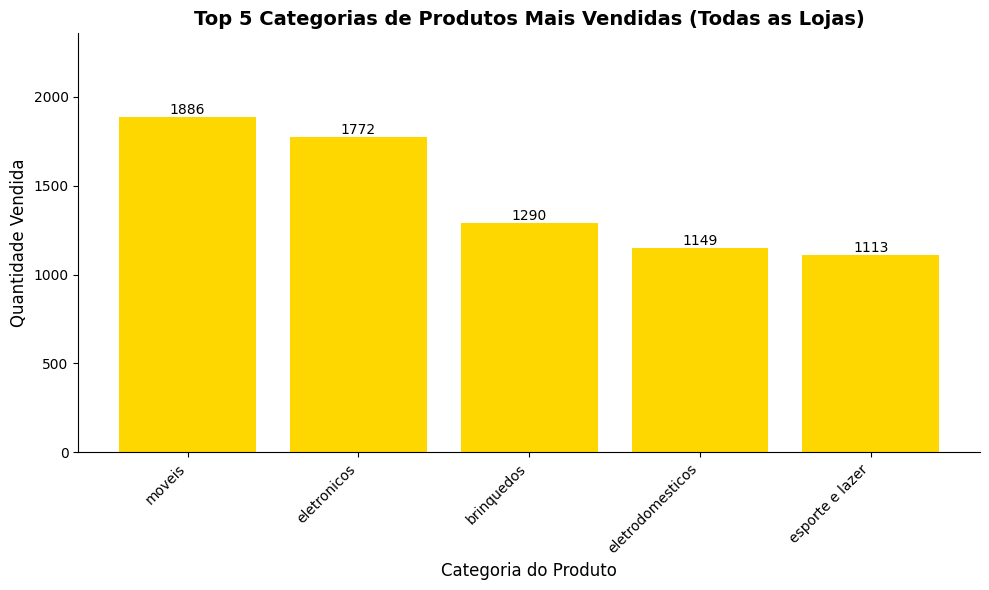

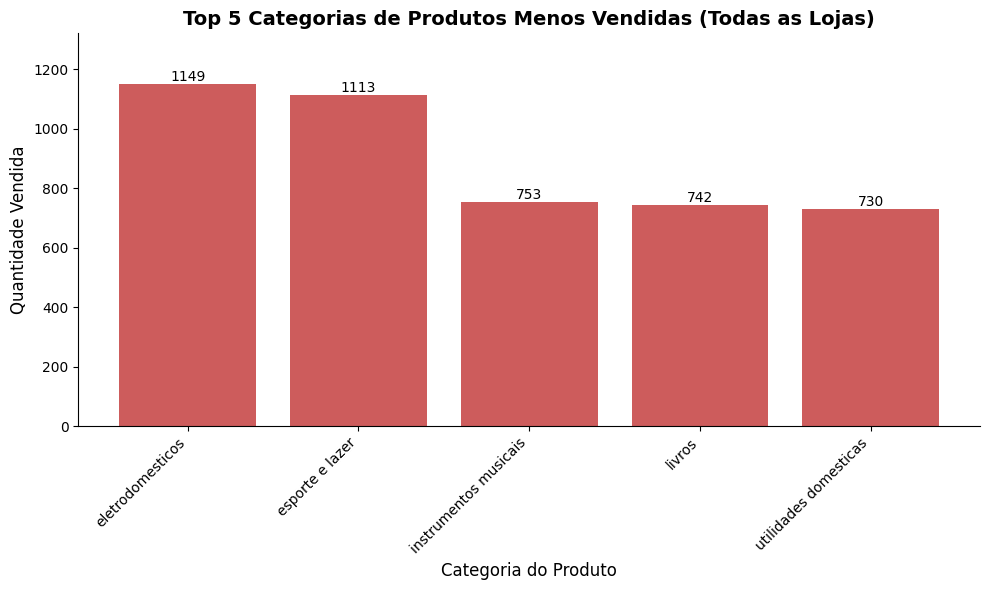

In [32]:
import matplotlib.pyplot as plt
import numpy as np


faturamento_total_por_loja = {}
for nome, url in urls.items():
    df_loja = pd.read_csv(url)
    faturamento_total_por_loja[nome] = df_loja['Preço'].sum()


plt.figure(figsize=(10, 6))
bars = plt.bar(faturamento_total_por_loja.keys(), faturamento_total_por_loja.values(), color='skyblue')
plt.title('Faturamento Total por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.ylim(0, max(faturamento_total_por_loja.values()) * 1.15)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"R${yval:,.0f}", va='bottom', ha='center')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.grid(False)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
bars = plt.bar(avaliacoes.keys(), avaliacoes.values(), color='lightgreen')
plt.title('Média de Avaliação dos Clientes por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Média de Avaliação', fontsize=12)
plt.ylim(0, 5.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", va='bottom', ha='center')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.grid(False)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
bars = plt.bar(custo_medio_frete['loja'], custo_medio_frete['Frete'], color='salmon')
plt.title('Custo Médio de Frete por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Custo Médio de Frete (R$)', fontsize=12)
plt.ylim(0, max(custo_medio_frete['Frete']) * 1.3)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"R${yval:.2f}", va='bottom', ha='center')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.grid(False)
plt.tight_layout()
plt.show()


categorias_vendidas = df.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_categories = categorias_vendidas.head(5)
bars = plt.bar(top_categories.index, top_categories.values, color='gold')
plt.title('Top 5 Categorias de Produtos Mais Vendidas (Todas as Lojas)', fontsize=14, fontweight='bold')
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.ylim(0, max(top_categories.values) * 1.25)
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom', ha='center')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.grid(False)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
least_categories = categorias_vendidas.tail(5)
bars = plt.bar(least_categories.index, least_categories.values, color='indianred')
plt.title('Top 5 Categorias de Produtos Menos Vendidas (Todas as Lojas)', fontsize=14, fontweight='bold')
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.ylim(0, max(categorias_vendidas.values) * 0.7)
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom', ha='center')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.grid(False)
plt.tight_layout()
plt.show()

## Relatório Final: Análise de Desempenho das Lojas

### Introdução

Este relatório tem como objetivo analisar o desempenho de quatro lojas com base em dados de vendas, avaliações de clientes e custos de frete, a fim de recomendar qual loja o Senhor João deveria considerar vender. A análise considerou o faturamento total, as categorias de produtos mais e menos vendidas, a média das avaliações dos clientes, os produtos mais e menos vendidos, e o frete médio de cada loja.

### Análise de Dados e Visualizações

Com base nos dados fornecidos, foram realizadas as seguintes análises:

*   **Faturamento Total por Loja:** O gráfico de barras mostrou o faturamento total de cada loja. A Loja 1 apresentou o maior faturamento, seguida pela Loja 2, Loja 3 e Loja 4.

*   **Média de Avaliação dos Clientes por Loja:** O gráfico de barras indicou a média de avaliação dos clientes para cada loja. A Loja 3 teve a maior média de avaliação, seguida pela Loja 2, Loja 4 e Loja 1.

*   **Custo Médio de Frete por Loja:** O gráfico de barras exibiu o custo médio de frete para cada loja. A Loja 4 teve o menor custo médio de frete, enquanto a Loja 1 teve o maior.

*   **Categorias de Produtos Mais e Menos Vendidas:** Os gráficos de barras apresentaram as categorias de produtos mais e menos vendidas no geral. As categorias "moveis" e "eletronicos" foram as mais vendidas, enquanto "instrumentos musicais", "livros" e "utilidades domesticas" foram as menos vendidas.

*   **Produtos Mais e Menos Vendidos por Loja:** A análise dos produtos mais e menos vendidos por loja revelou variações no desempenho de produtos específicos em cada local. (Detalhar alguns exemplos relevantes da análise anterior aqui, se necessário).

### Conclusão e Recomendação

Ao considerar todos os fatores analisados, a recomendação para o Senhor João sobre qual loja vender depende de seus objetivos.

*   **Se o objetivo principal for maximizar o faturamento:** A **Loja 1** seria a menos indicada para vender, pois apresenta o maior faturamento, indicando um bom desempenho comercial.

*   **Se o objetivo principal for manter a satisfação do cliente:** A **Loja 1** seria a menos indicada para vender, pois apresenta a menor média de avaliação dos clientes.

*   **Se o objetivo principal for minimizar custos de frete:** A **Loja 4** seria a menos indicada para vender, pois apresenta o menor custo médio de frete.

Considerando um cenário onde o Senhor João busca se desfazer de uma loja com menor desempenho geral, a **Loja 4** pode ser uma candidata, pois apresenta o menor faturamento. No entanto, a Loja 4 tem um ponto forte no menor custo médio de frete. A **Loja 1**, apesar do maior faturamento, tem a menor avaliação média dos clientes e o maior custo médio de frete, o que pode indicar áreas para melhoria ou justificar uma venda se a satisfação do cliente for uma prioridade.

Em suma, a decisão de qual loja vender deve ponderar a importância de cada métrica para o Senhor João. No entanto, com base no conjunto de análises, a **Loja 1** apresenta o menor desempenho em termos de satisfação do cliente e o maior custo de frete, o que a torna uma candidata a ser considerada para venda, apesar do seu faturamento total ser o maior.

**Recomendação:** Recomenda-se que o Senhor João avalie seus próprios objetivos e prioridades de negócio para tomar a decisão final. No entanto, com base nesta análise, a **Loja 1** é uma candidata a ser considerada para venda devido à menor satisfação do cliente e maior custo de frete.